In [1]:
!pip install pandas seaborn scikit-learn numpy matplotlib scipy

Loading and preprocessing data...
Original Data Shape: (800, 4096)
Reduced Data Shape (PCA): (800, 100)

Evaluating classifiers with cross-validation...

Naive Bayes Mean Accuracy: 97.62%
SVM (RBF kernel) Mean Accuracy: 98.25%
Random Forest Mean Accuracy: 99.00%

Naive Bayes Classification Report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      1.00      1.00        20
           2       0.91      1.00      0.95        20
           3       1.00      0.80      0.89        20
           4       1.00      0.90      0.95        20
           5       1.00      1.00      1.00        20
           6       0.91      1.00      0.95        20
           7       1.00      1.00      1.00        20
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      0.95      0.97        

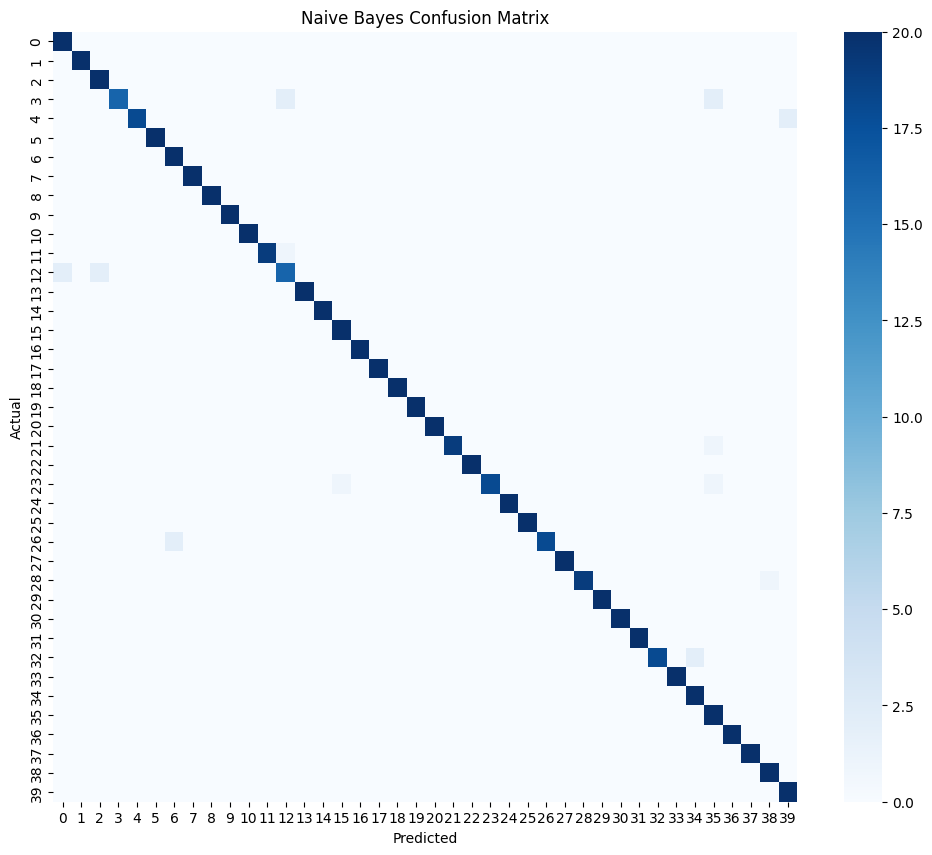

Visualizing misclassified faces for Naive Bayes...
Total misclassified samples: 19


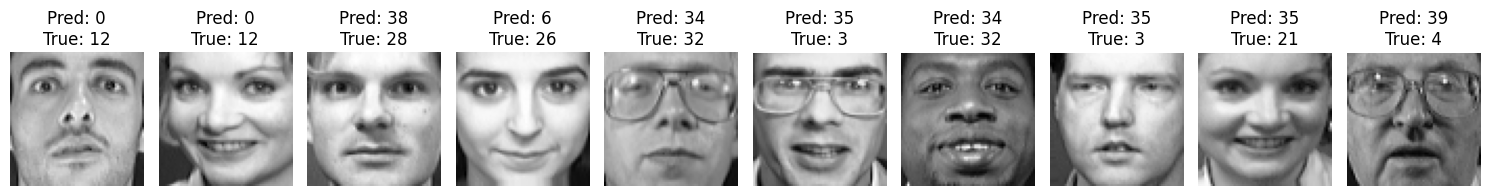


SVM (RBF kernel) Classification Report:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       0.90      0.95      0.93        20
           4       1.00      0.90      0.95        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       0.90      0.90      0.90        20
           8       1.00      1.00      1.00        20
           9       1.00      0.90      0.95        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       0.95      0.90      0.92        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      

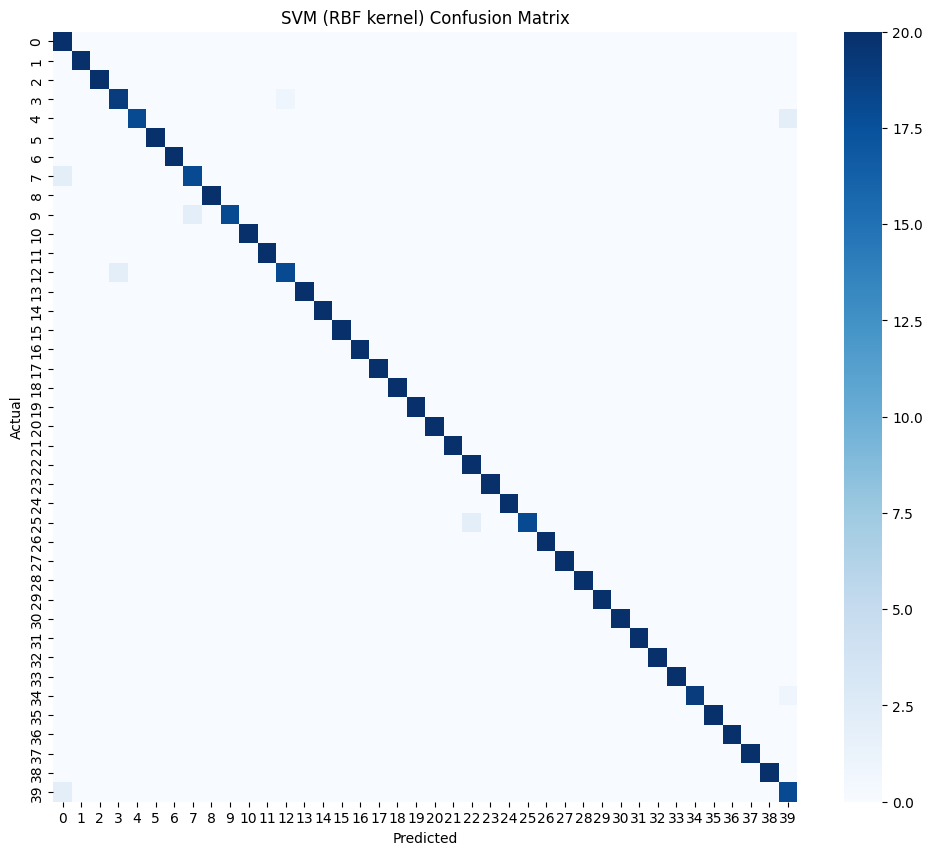

Visualizing misclassified faces for SVM (RBF kernel)...
Total misclassified samples: 14


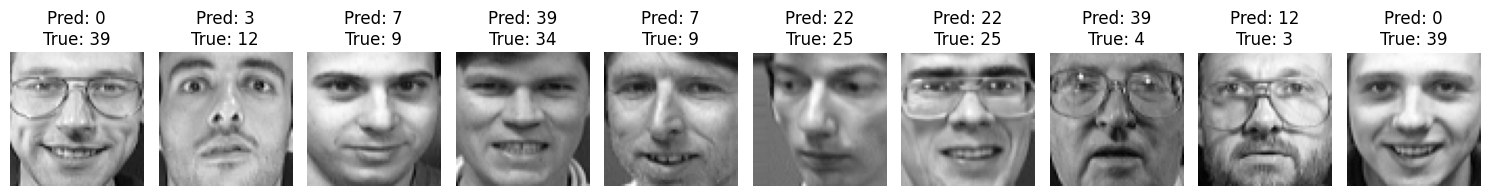


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      0.90      0.95        20
           5       0.95      1.00      0.98        20
           6       1.00      1.00      1.00        20
           7       1.00      0.90      0.95        20
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      0.85      0.92        20
          13       1.00      1.00      1.00        20
          14       0.91      1.00      0.95        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.0

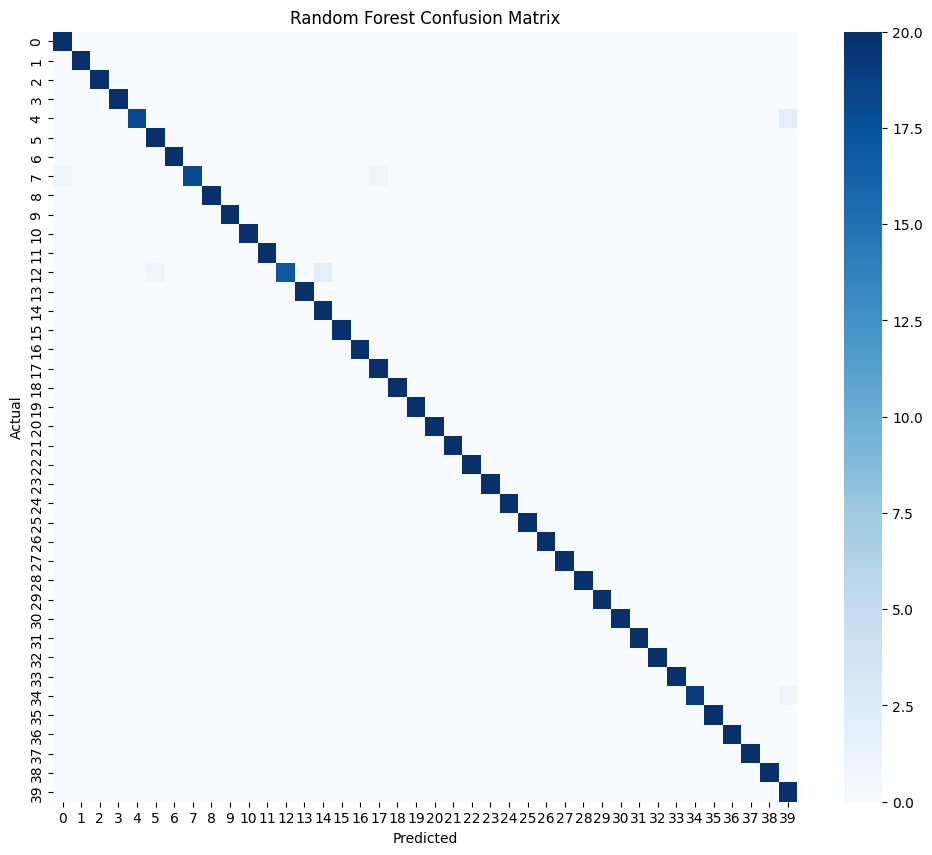

Visualizing misclassified faces for Random Forest...
Total misclassified samples: 8


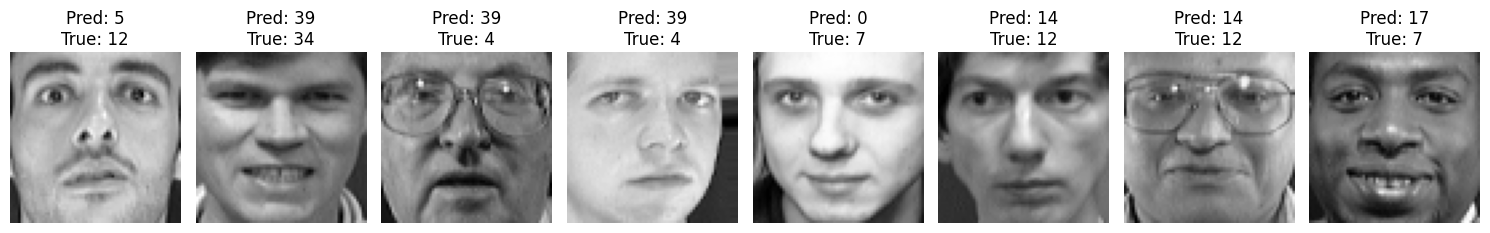


PCA Tuning Curve (Naive Bayes)...
PCA Components: 20, Mean Accuracy: 96.25%
PCA Components: 40, Mean Accuracy: 99.00%
PCA Components: 60, Mean Accuracy: 98.00%
PCA Components: 80, Mean Accuracy: 98.12%
PCA Components: 100, Mean Accuracy: 97.62%
PCA Components: 150, Mean Accuracy: 96.62%
PCA Components: 200, Mean Accuracy: 96.50%


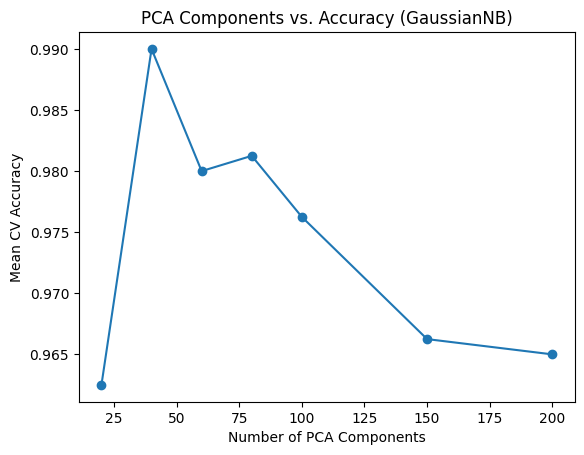

In [1]:
"""
Olivetti Faces Recognition Project

This program shows how a computer can learn to recognize faces using simple machine learning methods.
It is designed to be easy to understand, even for non-coders!

Author: <Amol Kulkarni>
"""

# Import necessary tools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings

# Ignore some warnings to make output cleaner
warnings.filterwarnings('ignore', category=UserWarning)

def load_and_preprocess_data(augment=True):
    """
    Loads the Olivetti Faces dataset, scales it, and does optional data augmentation (flipping images).
    Returns:
        X_scaled: The processed data (numbers representing faces)
        y: The labels (person IDs)
        images: The images (for visualization)
    """
    # Load images and labels
    data = fetch_olivetti_faces(shuffle=True, random_state=42)
    X, y, images = data.data, data.target, data.images

    # Standardize pixel values for better learning
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    if augment:
        # Flip images left-right to double the data
        X_flip = images[:, :, ::-1]
        X_flip_flat = X_flip.reshape(X_flip.shape[0], -1)
        X_flip_scaled = scaler.transform(X_flip_flat)
        # Add flipped data
        X_scaled = np.vstack([X_scaled, X_flip_scaled])
        y = np.concatenate([y, y])
        images = np.vstack([images, X_flip])
    return X_scaled, y, images

def perform_pca(X, n_components=100):
    """
    Uses PCA to keep only the most important features in the data.
    This helps the computer focus on what matters most.
    """
    pca = PCA(n_components=n_components, random_state=42)
    X_pca = pca.fit_transform(X)
    return X_pca, pca

def evaluate_classifiers(X, y, classifiers, n_splits=5):
    """
    Trains and tests each classifier using cross-validation and prints their accuracy.
    Returns:
        results: A dictionary with each model's accuracy and predictions.
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    results = {}
    for name, model in classifiers.items():
        accs, y_true_all, y_pred_all = [], [], []
        for train_idx, test_idx in skf.split(X, y):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accs.append(accuracy_score(y_test, y_pred))
            y_true_all.append(y_test)
            y_pred_all.append(y_pred)
        results[name] = {
            "mean_accuracy": np.mean(accs),
            "y_true": np.concatenate(y_true_all),
            "y_pred": np.concatenate(y_pred_all)
        }
        print(f"{name} Mean Accuracy: {np.mean(accs)*100:.2f}%")
    return results

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    """
    Shows a chart of where the model got things right or wrong.
    Darker squares mean more mistakes.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def visualize_misclassified(images, y_true, y_pred, num_samples=10):
    """
    Shows pictures where the computer guessed wrong.
    """
    misclassified = np.where(y_true != y_pred)[0]
    print(f"Total misclassified samples: {len(misclassified)}")
    if len(misclassified) == 0:
        print("No misclassified samples to show.")
        return
    plt.figure(figsize=(15, 4))
    for i, idx in enumerate(misclassified[:num_samples]):
        plt.subplot(1, min(num_samples, len(misclassified)), i+1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"Pred: {y_pred[idx]}\nTrue: {y_true[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def pca_tuning_curve(X, y, classifier, components_range):
    """
    Tests how the number of 'details' (PCA components) changes accuracy.
    Shows a chart of this effect.
    """
    mean_accuracies = []
    for n_components in components_range:
        X_pca = PCA(n_components=n_components, random_state=42).fit_transform(X)
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        accs = []
        for train_idx, test_idx in skf.split(X_pca, y):
            X_train, X_test = X_pca[train_idx], X_pca[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            classifier.fit(X_train, y_train)
            y_pred = classifier.predict(X_test)
            accs.append(accuracy_score(y_test, y_pred))
        mean_acc = np.mean(accs)
        mean_accuracies.append(mean_acc)
        print(f"PCA Components: {n_components}, Mean Accuracy: {mean_acc*100:.2f}%")
    plt.plot(components_range, mean_accuracies, marker='o')
    plt.xlabel('Number of PCA Components')
    plt.ylabel('Mean CV Accuracy')
    plt.title(f'PCA Components vs. Accuracy ({classifier.__class__.__name__})')
    plt.show()

def main():
    print("Loading and preprocessing data...")
    # Set augment=True to use horizontal flip augmentation
    X, y, images = load_and_preprocess_data(augment=True)
    print("Original Data Shape:", X.shape)

    # PCA: you can tune n_components
    n_components = 100
    X_pca, pca = perform_pca(X, n_components=n_components)
    print("Reduced Data Shape (PCA):", X_pca.shape)

    # Classifiers to evaluate
    classifiers = {
        "Naive Bayes": GaussianNB(),
        "SVM (RBF kernel)": SVC(kernel='rbf', gamma='scale', random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
    }

    print("\nEvaluating classifiers with cross-validation...\n")
    results = evaluate_classifiers(X_pca, y, classifiers, n_splits=5)

    for name, res in results.items():
        print(f"\n{name} Classification Report:\n")
        print(classification_report(res["y_true"], res["y_pred"], zero_division=0))
        plot_confusion_matrix(res["y_true"], res["y_pred"], title=f"{name} Confusion Matrix")
        print(f"Visualizing misclassified faces for {name}...")
        visualize_misclassified(images, res["y_true"], res["y_pred"], num_samples=10)

    # PCA Tuning Curve (for Naive Bayes, but you can change to other classifiers)
    print("\nPCA Tuning Curve (Naive Bayes)...")
    components_range = [20, 40, 60, 80, 100, 150, 200]
    pca_tuning_curve(X, y, GaussianNB(), components_range)

if __name__ == "__main__":
    main()